## ***TUGAS BESAR PENAMBANGAN DATA KELOMPOK 7***
### **Analisis Penerapan Data Mining untuk Prediksi Risiko Stroke Menggunakan K-Means Clustering dan Naive Bayes**

---

#### ***NAMA ANGGOTA KELOMPOK -- NIM***

**Arjuna Dwi Putra Kunaefi -- 102022300152**

**Raihan Tri Darma -- 102022300242**

**Rara Lianisyah -- 102022300216**

**Valerina Sherin Saprita -- 102022330089**

---

### 📄 Informasi Dataset

Sebuah tim tugas besar kelompok 7 sedang mengembangkan sistem prediksi risiko stroke berdasarkan karakteristik demografis dan kondisi kesehatan pasien. Tujuannya adalah membantu tenaga medis mengenali individu dengan potensi stroke lebih awal, sehingga intervensi medis bisa diberikan secara preventif.

Dataset yang digunakan berisi informasi berikut:

- **id** : ID unik pasien
- **gender** : Jenis kelamin pasien
- **age** : Usia pasien
- **hypertension** : Riwayat hipertensi (0 = Tidak, 1 = Ya)
- **heart_disease** : Riwayat penyakit jantung (0 = Tidak, 1 = Ya)
- **ever_married** : Status pernah menikah (Yes/No)
- **work_type : Jenis** pekerjaan pasien (Private, Self-employed, Govt_job, dll)
- **Residence_type** : Jenis tempat tinggal (Urban atau Rural)
- **avg_glucose_level** : Rata-rata kadar glukosa dalam darah
- **bmi** : Indeks massa tubuh pasien
- **smoking_status** : Riwayat merokok (formerly smoked, never smoked, smokes, unknown)
- **stroke** : Target prediksi, apakah pasien pernah mengalami stroke (1 = Ya, 0 = Tidak)


Tim memutuskan untuk menggunakan algoritma klasifikasi Naive Bayes untuk membangun model prediksi risiko stroke yang ringan namun efektif, terutama untuk implementasi awal di sistem layanan kesehatan berbasis aplikasi.

Setelah model selesai dibuat dan dievaluasi, tim juga membangun dashboard interaktif menggunakan Streamlit, dengan fitur:

* Input data pasien secara manual untuk memprediksi risiko stroke
* Visualisasi sebaran data dan performa model secara interaktif
* Evaluasi akurasi, presisi, recall, dan AUC ROC score dari model

---

# **PREDIKSI DAN SEGMENTASI RISIKO STROKE PADA PASIEN MENGGUNAKAN NAIVE BAYES**

## **Data Understanding**

Import Library

In [83]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import statsmodels.api as sm
from joblib import dump

Load Dataset

In [84]:
df = pd.read_csv("healthcare-dataset-stroke-data.csv")
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


Informasi Struktur Data

In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


Statistik Deskriptif

In [86]:
df.describe(include='all')

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
count,5110.000000,5110,5110.000000,5110.000000,5110.000000,5110,5110,5110,5110.000000,4909.000000,5110,5110.000000
unique,NaN,3,NaN,NaN,NaN,2,5,2,NaN,NaN,4,NaN
top,NaN,Female,NaN,NaN,NaN,Yes,Private,Urban,NaN,NaN,never smoked,NaN
freq,NaN,2994,NaN,NaN,NaN,3353,2925,2596,NaN,NaN,1892,NaN
mean,36517.829354,NaN,43.226614,0.097456,0.054012,NaN,NaN,NaN,106.147677,28.893237,NaN,0.048728
std,21161.721625,NaN,22.612647,0.296607,0.226063,NaN,NaN,NaN,45.283560,7.854067,NaN,0.215320
min,67.000000,NaN,0.080000,0.000000,0.000000,NaN,NaN,NaN,55.120000,10.300000,NaN,0.000000
25%,17741.250000,NaN,25.000000,0.000000,0.000000,NaN,NaN,NaN,77.245000,23.500000,NaN,0.000000
50%,36932.000000,NaN,45.000000,0.000000,0.000000,NaN,NaN,NaN,91.885000,28.100000,NaN,0.000000
75%,54682.000000,NaN,61.000000,0.000000,0.000000,NaN,NaN,NaN,114.090000,33.100000,NaN,0.000000


Cek Duplikasi & Missing Values

In [87]:
print("Jumlah data duplikat:", df.duplicated().sum())

df.isnull().sum()

Jumlah data duplikat: 0


id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

Distribusi Kolom Numerik

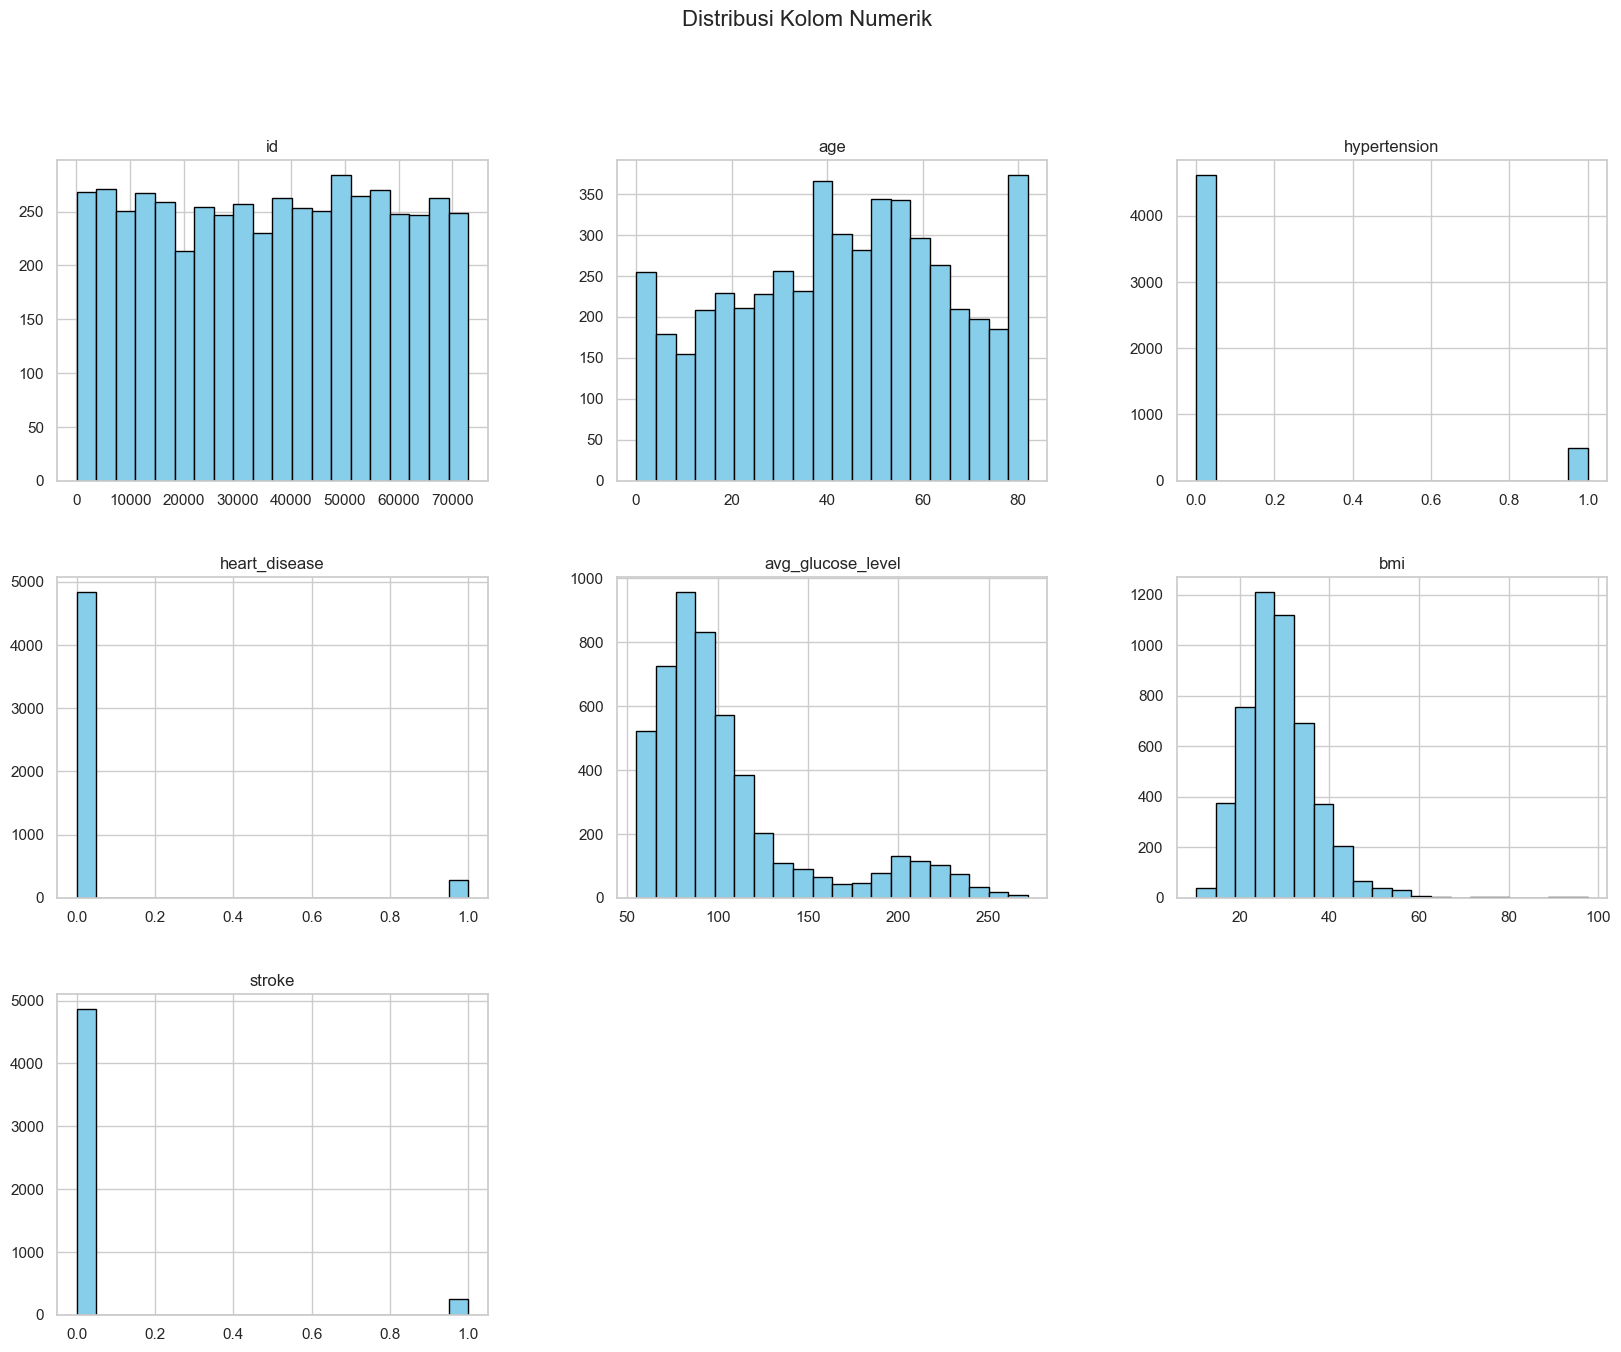

In [88]:
df.select_dtypes(include='number').hist(figsize=(20, 15), bins=20, color='skyblue', edgecolor='black')
plt.suptitle('Distribusi Kolom Numerik', fontsize=16)
plt.show()

Distribusi Target Stroke

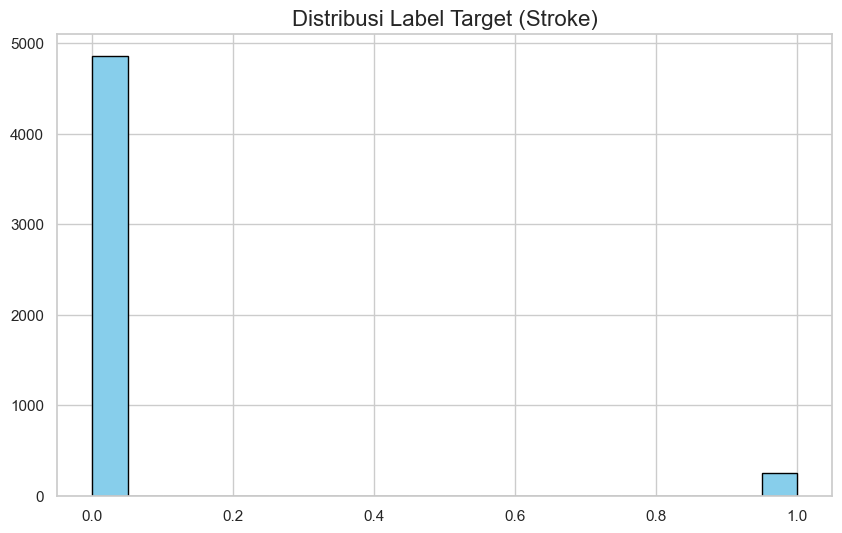

In [89]:
df['stroke'].hist(figsize=(10, 6), bins=20, color='skyblue', edgecolor='black')
plt.title('Distribusi Label Target (Stroke)', fontsize=16)
plt.show()

Boxplot Semua Kolom

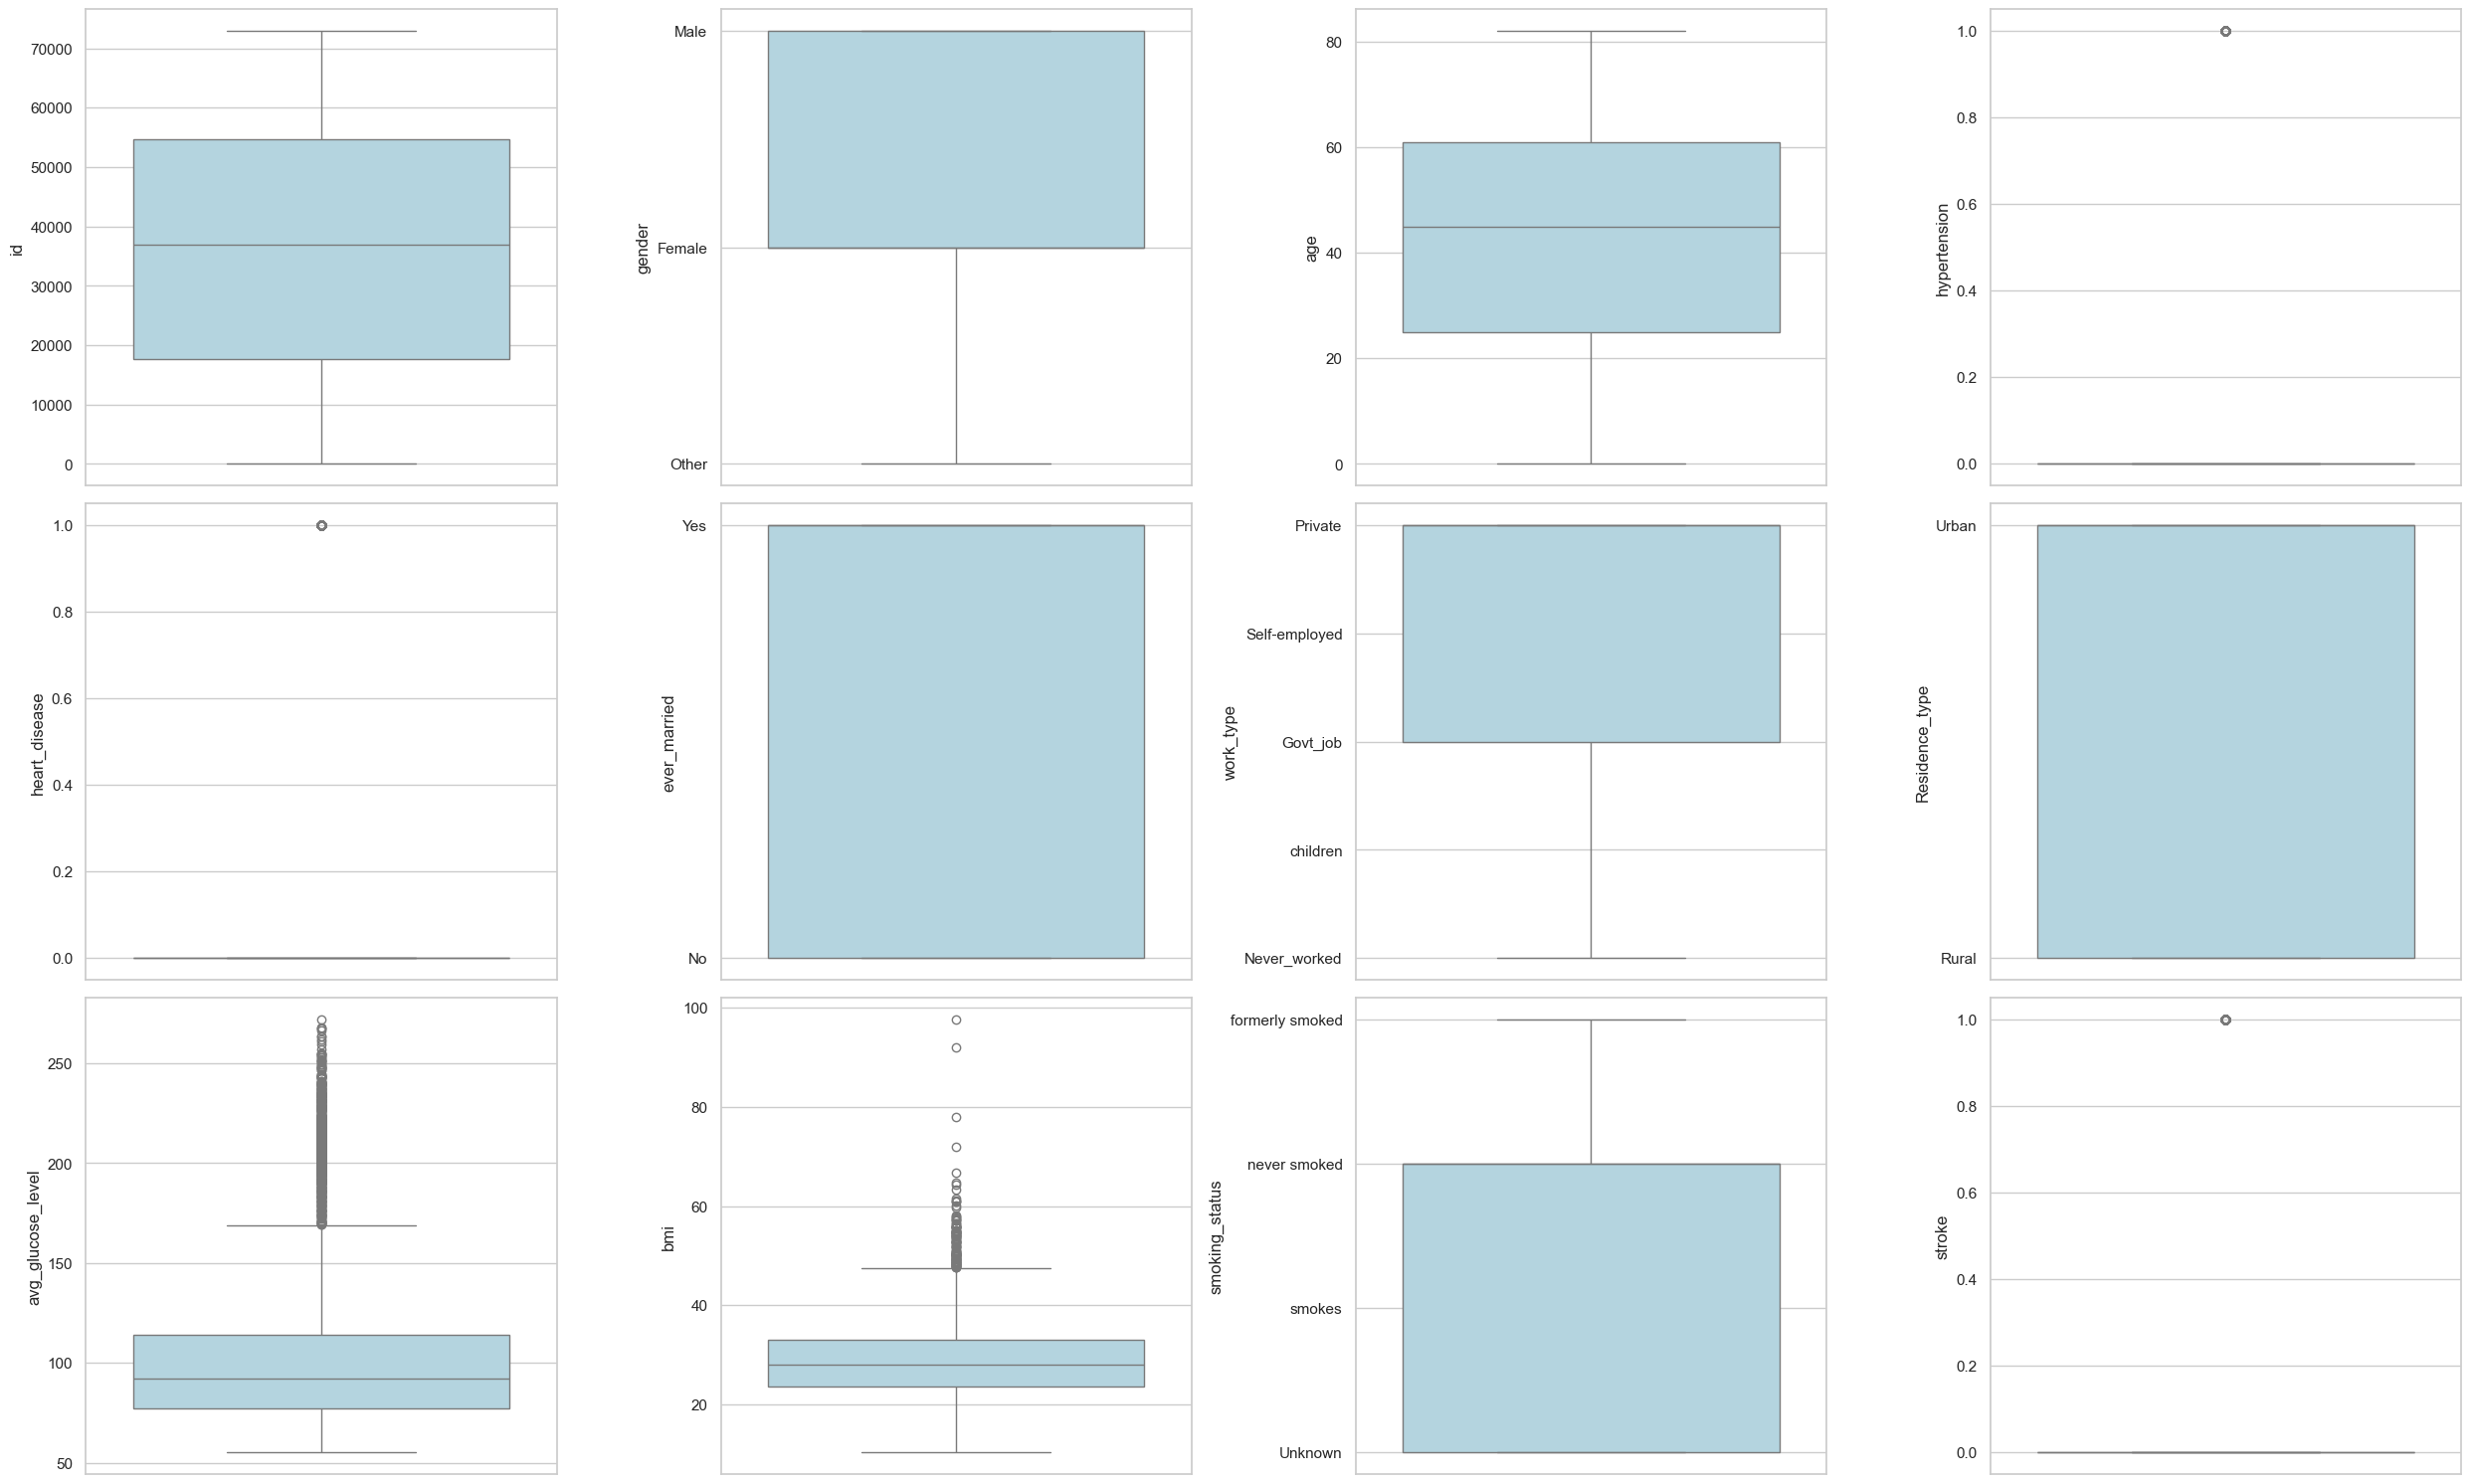

In [90]:
plt.figure(figsize=(25,30))
for i, column in enumerate(df):
    plt.subplot(6, 4, i + 1)
    sns.boxplot(df[column], color="lightblue")
plt.tight_layout()
plt.show()

Distribusi Gender

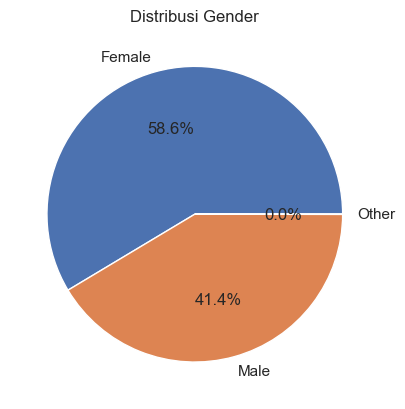

In [91]:
plt.pie(df.gender.value_counts(), labels=df.gender.value_counts().index, autopct='%1.1f%%')
plt.title("Distribusi Gender")
plt.show()

Cek Nilai Gender (Teks)

In [92]:
print("Distribusi gender:")
print(df['gender'].value_counts())

Distribusi gender:
gender
Female    2994
Male      2115
Other        1
Name: count, dtype: int64


Heatmap Korelasi

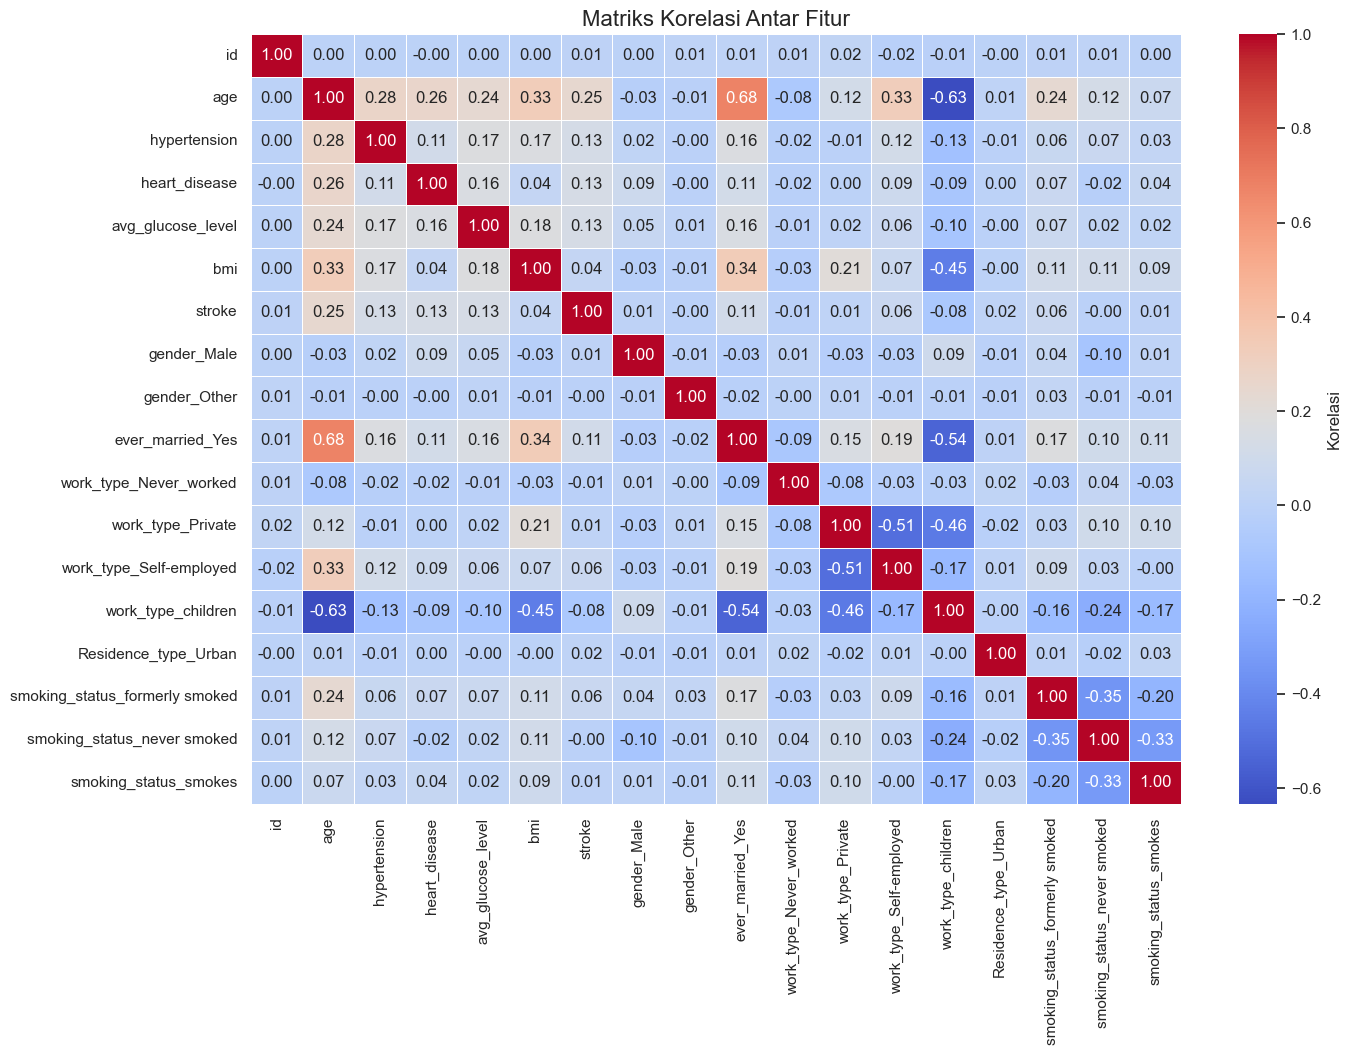

In [93]:
df_encoded = pd.get_dummies(df, drop_first=True)
correlation_matrix = df_encoded.corr()

plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5, cbar_kws={'label': 'Korelasi'})
plt.title('Matriks Korelasi Antar Fitur', fontsize=16)
plt.show()

## **Data Preparation**

### **Data Cleansing**

Import dan Inisialisasi Awal

In [94]:
import numpy as np
from sklearn.preprocessing import StandardScaler

Drop Kolom Tidak Diperlukan & Handle Missing Values

In [95]:
df.drop(columns=['id'], inplace=True, errors='ignore')
df.dropna(subset=['bmi', 'avg_glucose_level', 'smoking_status'], inplace=True)

Encoding Label Kategorikal

In [96]:
df['gender'] = df['gender'].map({'Male': 0, 'Female': 1, 'Other': 2})
df['Residence_type'] = df['Residence_type'].map({'Urban': 1, 'Rural': 0})
df['ever_married'] = df['ever_married'].map({'Yes': 1, 'No': 0})

One-Hot Encoding

In [97]:
df = pd.get_dummies(df, columns=['work_type', 'smoking_status'], drop_first=True)

Hapus Duplikasi

In [98]:
df = df.drop_duplicates()

Cek Informasi Dataset

In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4909 entries, 0 to 5109
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   gender                          4909 non-null   int64  
 1   age                             4909 non-null   float64
 2   hypertension                    4909 non-null   int64  
 3   heart_disease                   4909 non-null   int64  
 4   ever_married                    4909 non-null   int64  
 5   Residence_type                  4909 non-null   int64  
 6   avg_glucose_level               4909 non-null   float64
 7   bmi                             4909 non-null   float64
 8   stroke                          4909 non-null   int64  
 9   work_type_Never_worked          4909 non-null   bool   
 10  work_type_Private               4909 non-null   bool   
 11  work_type_Self-employed         4909 non-null   bool   
 12  work_type_children              4909 no

Deteksi & Hapus Outlier (IQR Method)

In [100]:
df_numeric = df.select_dtypes(include=['number'])
q1 = df_numeric.quantile(0.25)
q3 = df_numeric.quantile(0.75)
iqr = q3 - q1

lower = q1 - 1.5 * iqr
upper = q3 + 1.5 * iqr

df_outliers = df[~((df_numeric < lower) | (df_numeric > upper)).any(axis=1)]

Visualisasi Outlier Setelah Step Pertama

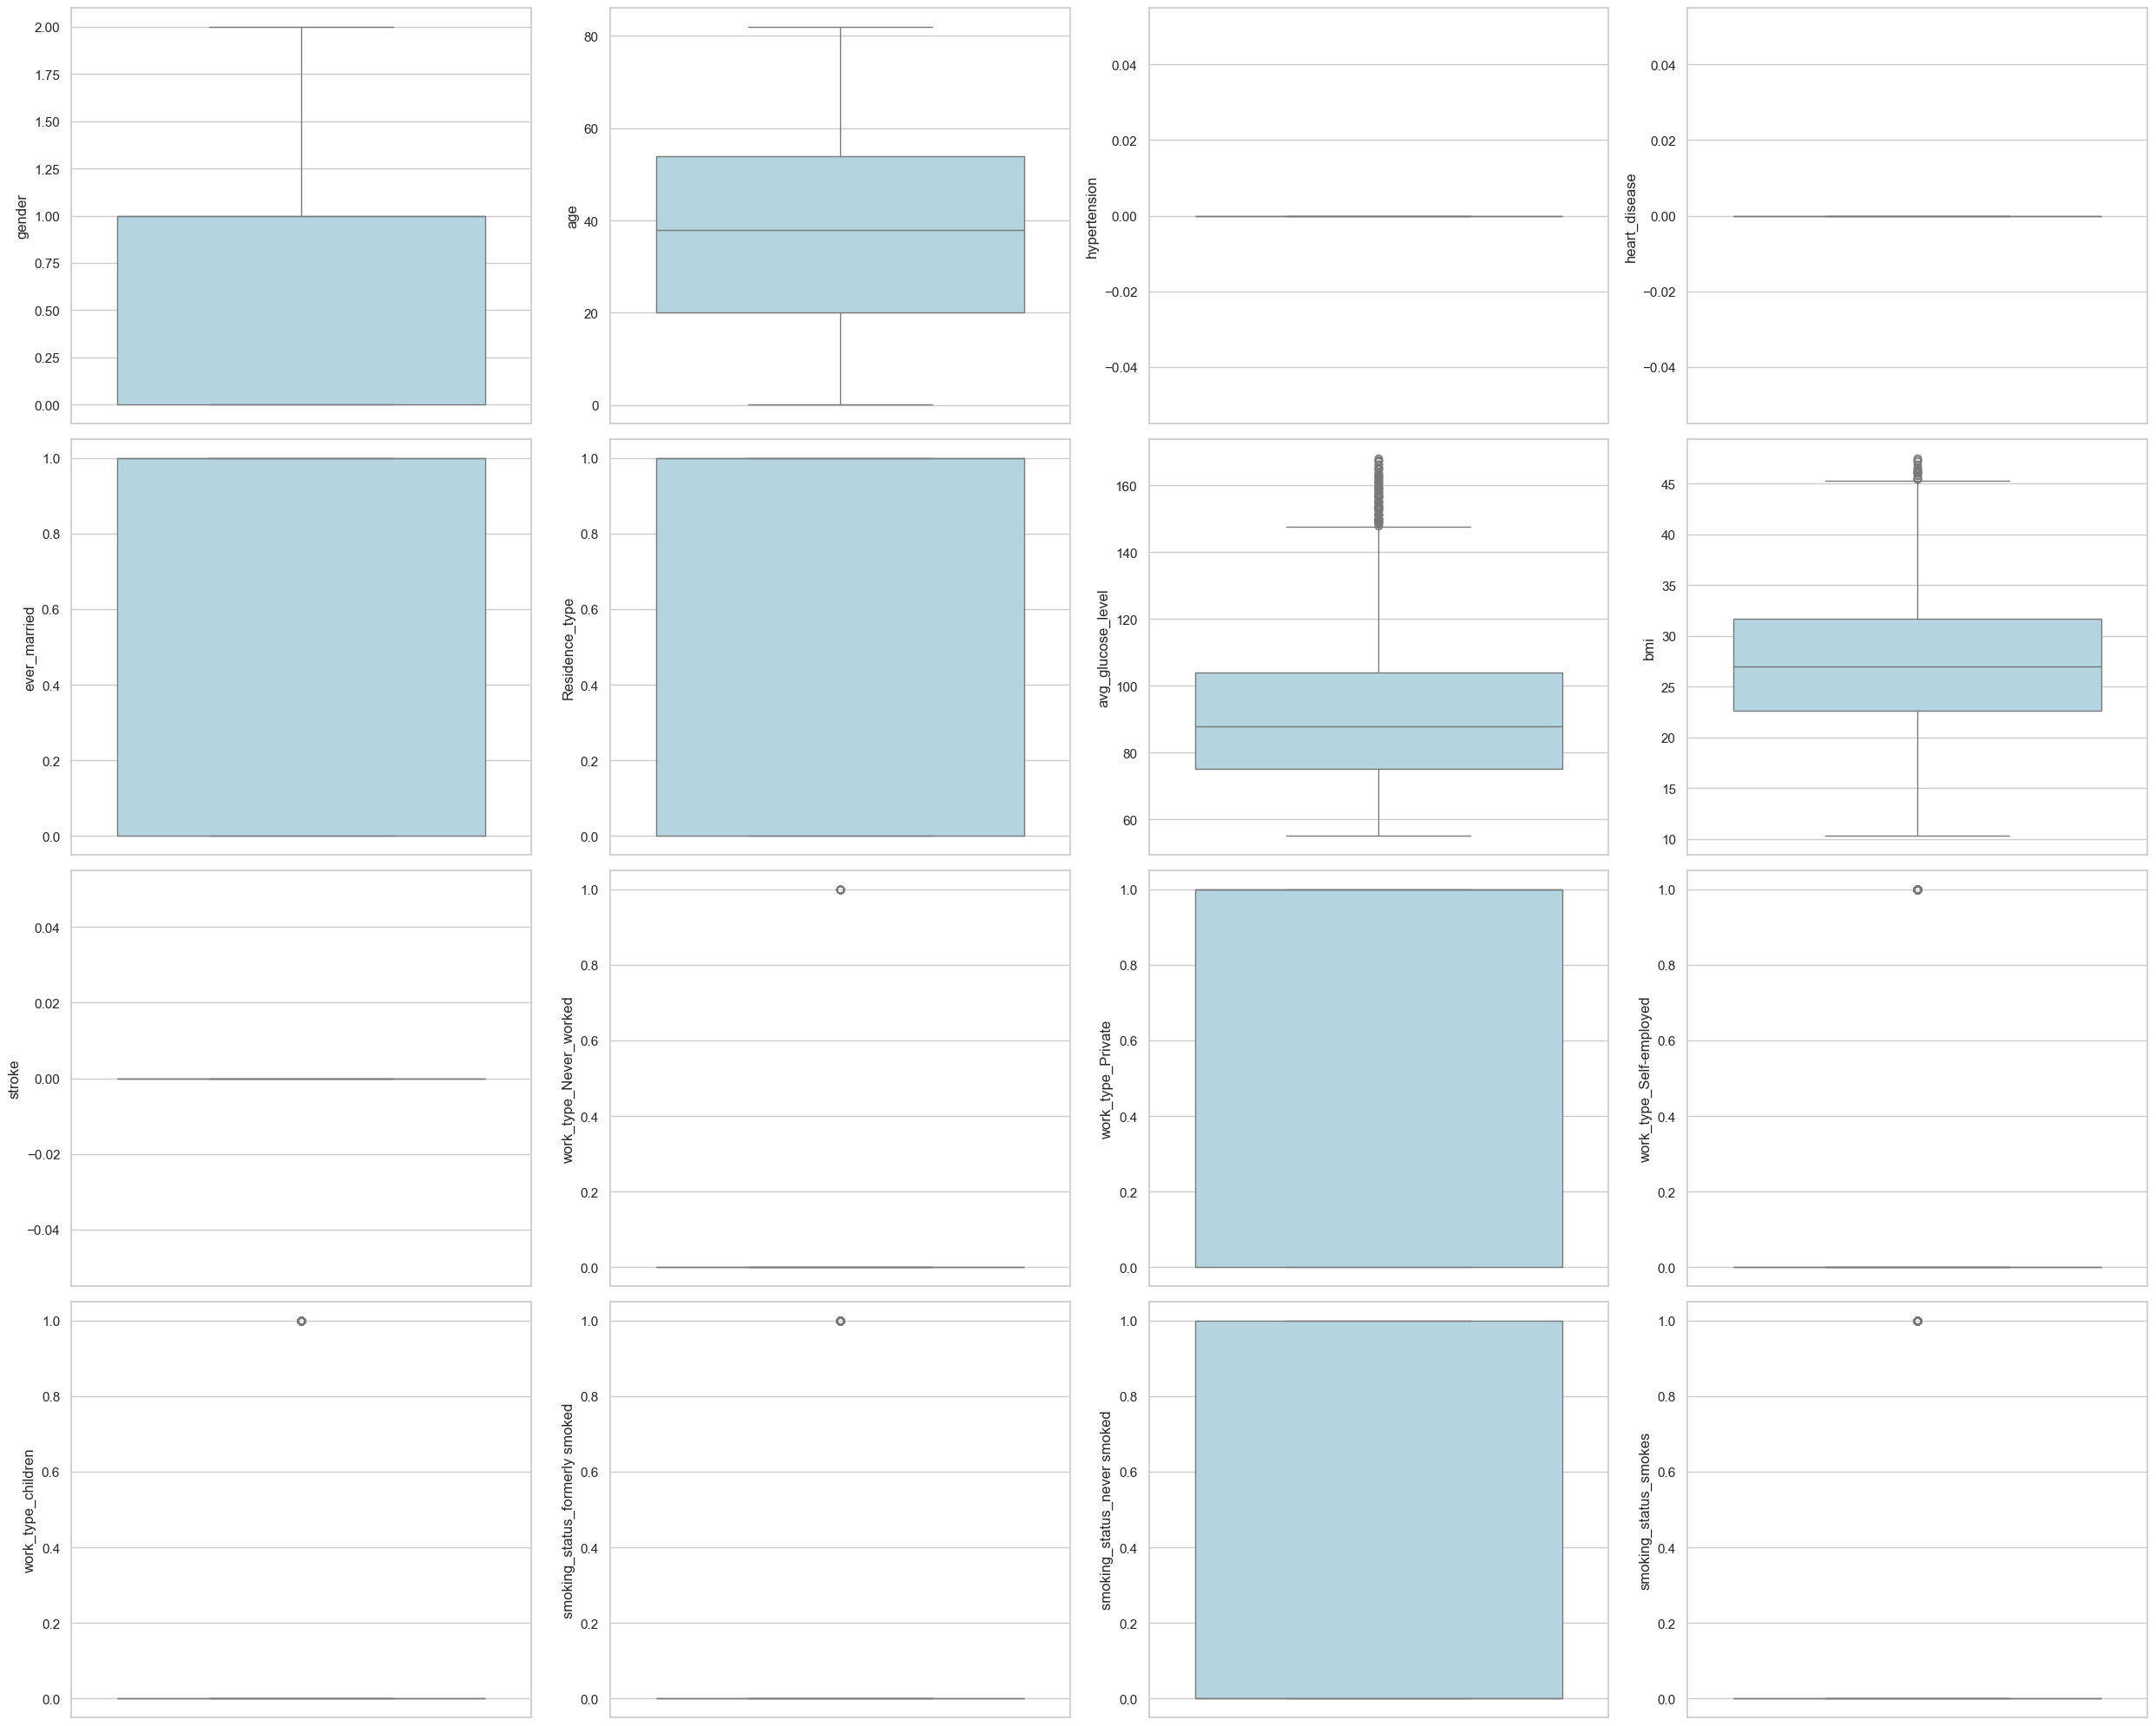

In [101]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(25,30))
for i, column in enumerate(df_outliers):
    plt.subplot(6, 4, i + 1)
    sns.boxplot(df_outliers[column], color="lightblue")
plt.tight_layout()
plt.show()

Ulangi Filter Outlier Kedua Kali

In [102]:
df_numeric2 = df_outliers.select_dtypes(include=['number'])
q1 = df_numeric2.quantile(0.25)
q3 = df_numeric2.quantile(0.75)
iqr = q3 - q1

lower = q1 - 1.5 * iqr
upper = q3 + 1.5 * iqr

df_outliers2 = df_outliers[~((df_numeric2 < lower) | (df_numeric2 > upper)).any(axis=1)]

Visualisasi Outlier Setelah Filtering Kedua

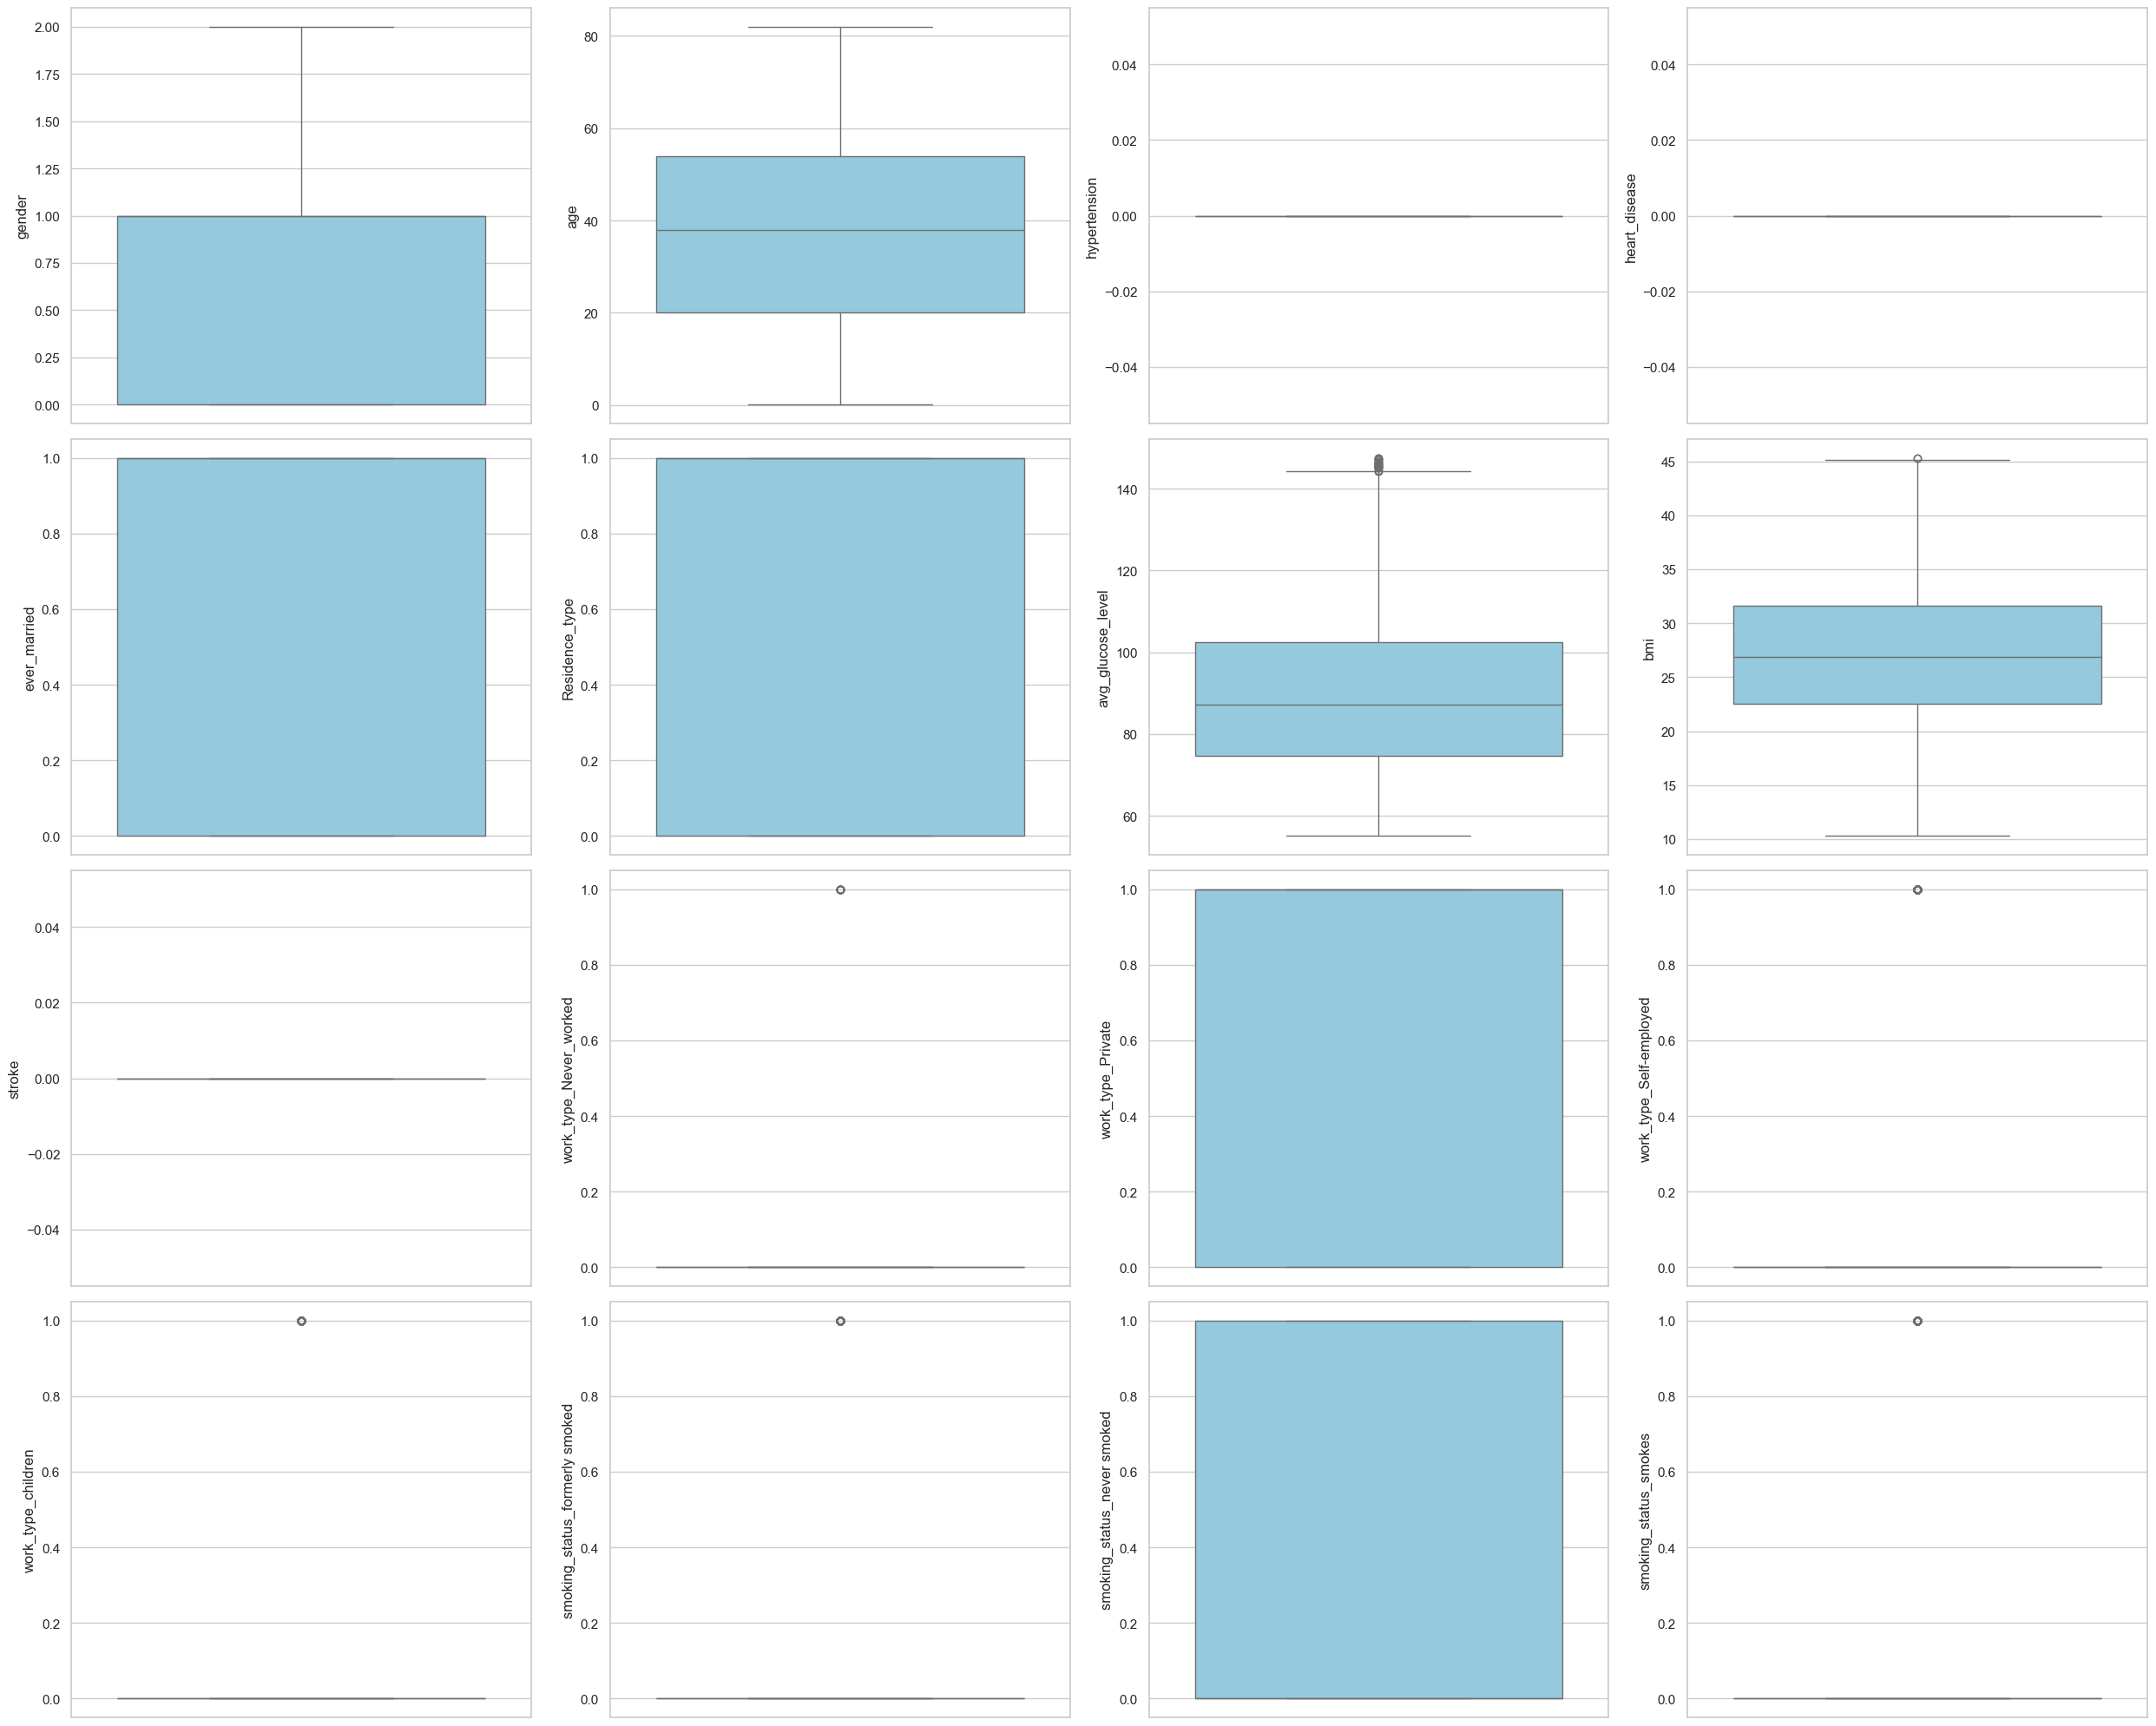

In [103]:
plt.figure(figsize=(25,30))
for i, column in enumerate(df_outliers2):
    plt.subplot(6, 4, i + 1)
    sns.boxplot(df_outliers2[column], color="skyblue")
plt.tight_layout()
plt.show()

### **Data Transformation**

Pisahkan Fitur dan Target

In [104]:
X = df.drop(columns=['stroke'])
y = df['stroke']

Lakukan Standardisasi pada Fitur

In [105]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

### **Data Balancing**


Cek Distribusi Awal Label stroke

In [106]:
df['stroke'].value_counts()

stroke
0    4700
1     209
Name: count, dtype: int64

Oversampling (Menyeimbangkan Label Stroke)

In [107]:
from sklearn.utils import resample

df_majority = df[df['stroke'] == 0]
df_minority = df[df['stroke'] == 1]

df_minority_upsampled = resample(
    df_minority,
    replace=True,
    n_samples=len(df_majority),
    random_state=42
)

df = pd.concat([df_majority, df_minority_upsampled])

Visualisasi Hasil Balancing

stroke
0    4700
1    4700
Name: count, dtype: int64


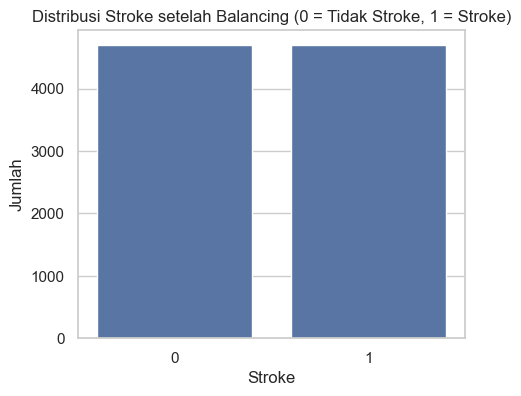

In [108]:
print(df.stroke.value_counts())

plt.figure(figsize=(5, 4))
sns.countplot(x='stroke', data=df)
plt.title("Distribusi Stroke setelah Balancing (0 = Tidak Stroke, 1 = Stroke)")
plt.xlabel("Stroke")
plt.ylabel("Jumlah")
plt.show()

Cek Missing Values Terakhir

In [109]:
print("Cek missing values:\n", df.isnull().sum())

Cek missing values:
 gender                            0
age                               0
hypertension                      0
heart_disease                     0
ever_married                      0
Residence_type                    0
avg_glucose_level                 0
bmi                               0
stroke                            0
work_type_Never_worked            0
work_type_Private                 0
work_type_Self-employed           0
work_type_children                0
smoking_status_formerly smoked    0
smoking_status_never smoked       0
smoking_status_smokes             0
dtype: int64


## **Modeling**

Import Library yang Diperlukan

In [110]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.impute import SimpleImputer

Load dan Preprocessing Awal

In [111]:
df = pd.read_csv("healthcare-dataset-stroke-data.csv")

df.drop(columns=['id'], errors='ignore', inplace=True)

df.dropna(subset=['bmi', 'smoking_status', 'avg_glucose_level'], inplace=True)

df['gender'] = df['gender'].map({'Male': 0, 'Female': 1, 'Other': 2})
df['Residence_type'] = df['Residence_type'].map({'Urban': 1, 'Rural': 0})

df = pd.get_dummies(df, drop_first=True)

Pisahkan Fitur dan Target

In [112]:
X = df.drop(columns='stroke')
y = df['stroke']

Imputasi 

In [113]:
imputer = SimpleImputer(strategy='mean')
X = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

Split Data untuk Pelatihan dan Pengujian

In [114]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

Latih Model Naive Bayes

In [115]:
model = GaussianNB()
model.fit(X_train, y_train)

GaussianNB()

Prediksi dan Evaluasi Awal

In [116]:
y_pred = model.predict(X_test)

print("Akurasi:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Akurasi: 0.560081466395112
Confusion Matrix:
 [[500 429]
 [  3  50]]
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.54      0.70       929
           1       0.10      0.94      0.19        53

    accuracy                           0.56       982
   macro avg       0.55      0.74      0.44       982
weighted avg       0.95      0.56      0.67       982



# **PREDIKSI DAN SEGMENTASI RISIKO STROKE PADA PASIEN MENGGUNAKAN K-MEANS CLUSTERING**

## **Data Understanding**

Import Library

In [117]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

Load Dataset

In [118]:
df = pd.read_csv("healthcare-dataset-stroke-data.csv")
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


Info Struktur Data

In [119]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


Statistik Deskriptif

In [120]:
df.describe(include='all')

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
count,5110.000000,5110,5110.000000,5110.000000,5110.000000,5110,5110,5110,5110.000000,4909.000000,5110,5110.000000
unique,NaN,3,NaN,NaN,NaN,2,5,2,NaN,NaN,4,NaN
top,NaN,Female,NaN,NaN,NaN,Yes,Private,Urban,NaN,NaN,never smoked,NaN
freq,NaN,2994,NaN,NaN,NaN,3353,2925,2596,NaN,NaN,1892,NaN
mean,36517.829354,NaN,43.226614,0.097456,0.054012,NaN,NaN,NaN,106.147677,28.893237,NaN,0.048728
std,21161.721625,NaN,22.612647,0.296607,0.226063,NaN,NaN,NaN,45.283560,7.854067,NaN,0.215320
min,67.000000,NaN,0.080000,0.000000,0.000000,NaN,NaN,NaN,55.120000,10.300000,NaN,0.000000
25%,17741.250000,NaN,25.000000,0.000000,0.000000,NaN,NaN,NaN,77.245000,23.500000,NaN,0.000000
50%,36932.000000,NaN,45.000000,0.000000,0.000000,NaN,NaN,NaN,91.885000,28.100000,NaN,0.000000
75%,54682.000000,NaN,61.000000,0.000000,0.000000,NaN,NaN,NaN,114.090000,33.100000,NaN,0.000000


Cek Missing Values dan Duplikat

In [121]:
print("Jumlah missing values per kolom:")
print(df.isnull().sum())

print("\nJumlah data duplikat:")
print(df.duplicated().sum())

Jumlah missing values per kolom:
id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

Jumlah data duplikat:
0


Visualisasi Distribusi Numerik

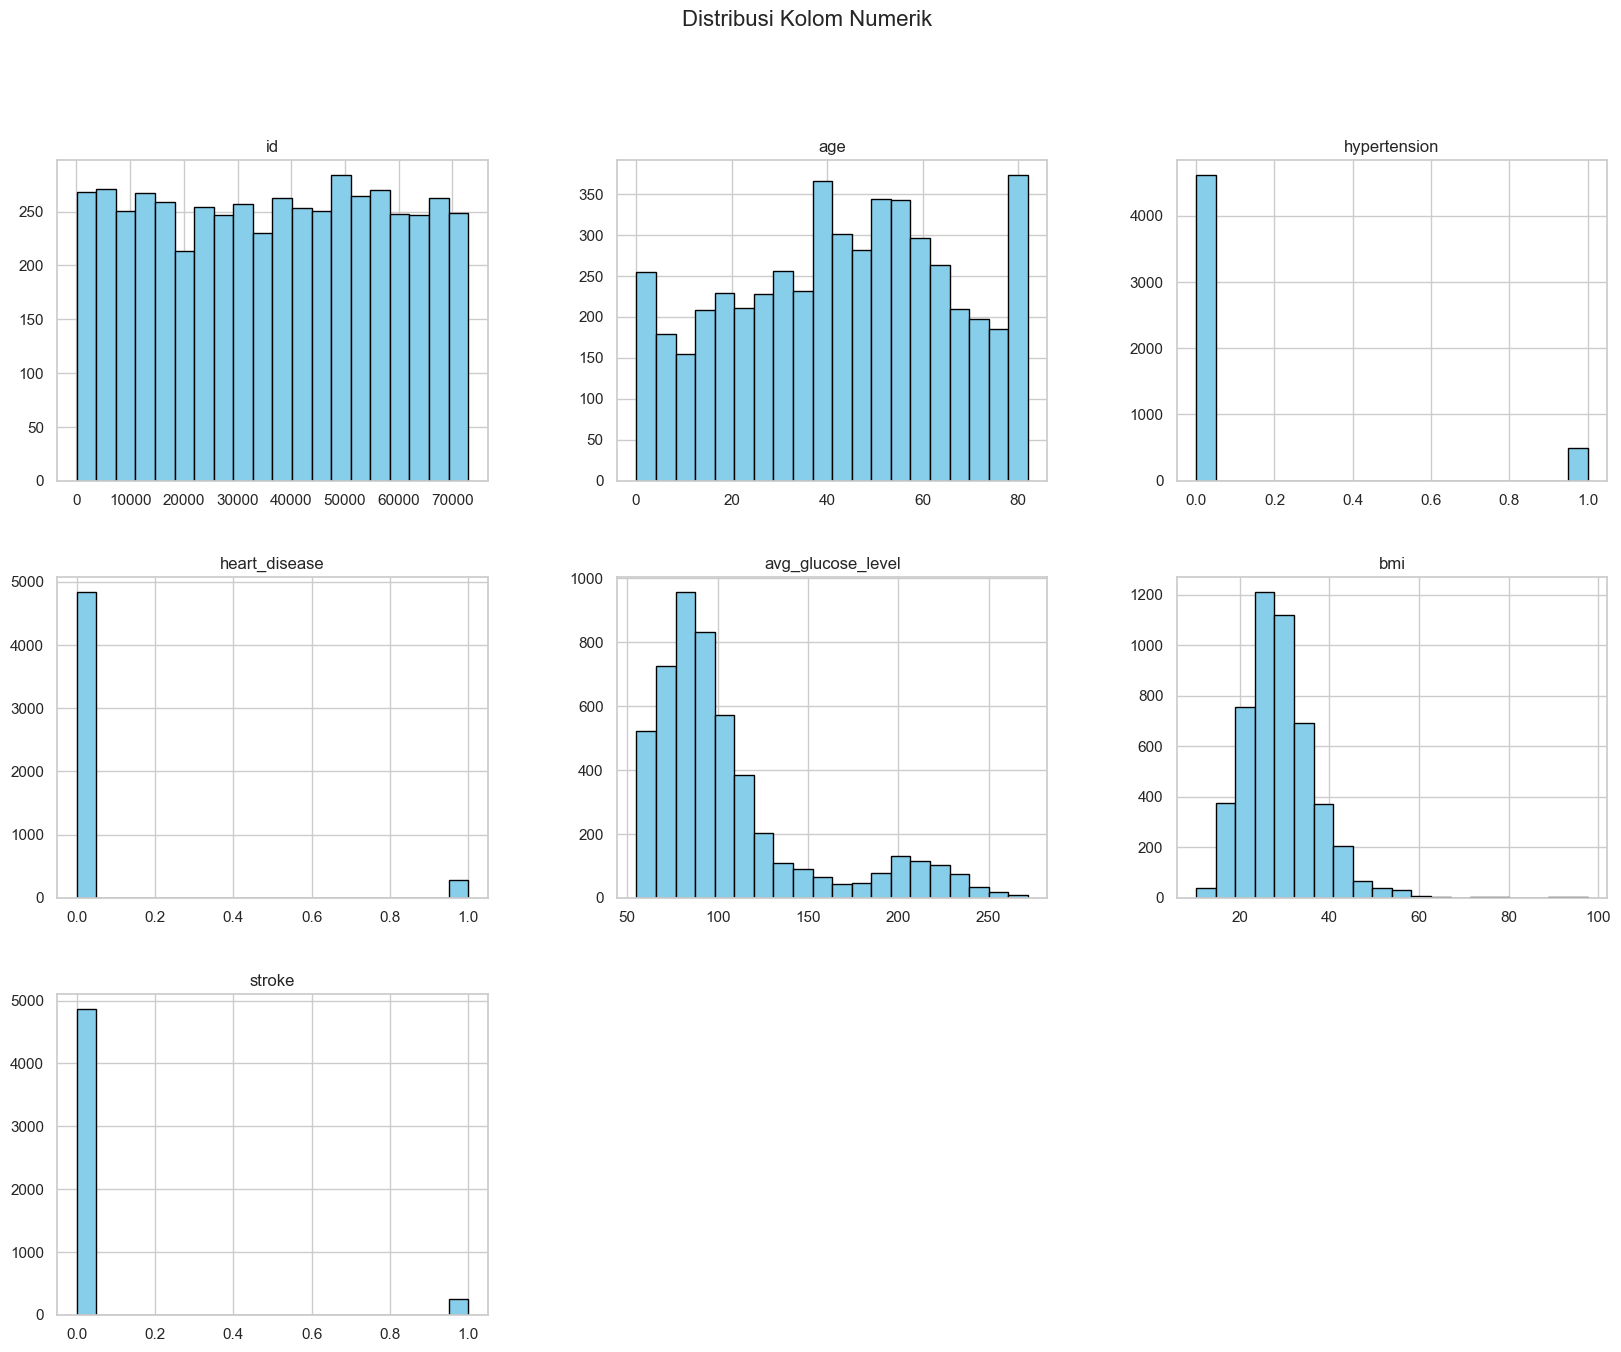

In [122]:
df.select_dtypes(include='number').hist(
    figsize=(20, 15), bins=20, color='skyblue', edgecolor='black'
)
plt.suptitle('Distribusi Kolom Numerik', fontsize=16)
plt.show()

Distribusi Target (Label stroke)

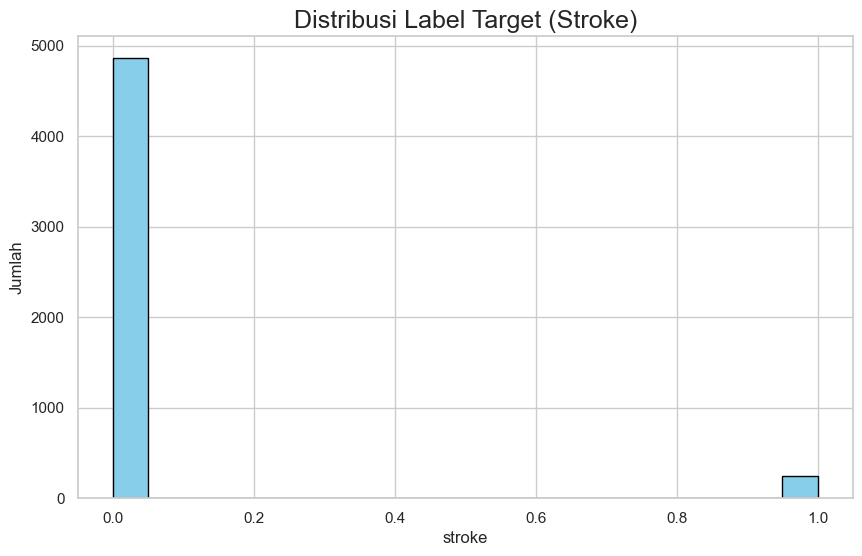

In [123]:
df['stroke'].hist(
    figsize=(10, 6), bins=20, color='skyblue', edgecolor='black'
)
plt.title('Distribusi Label Target (Stroke)', fontsize=18)
plt.xlabel('stroke')
plt.ylabel('Jumlah')
plt.show()

Boxplot untuk Deteksi Outlier

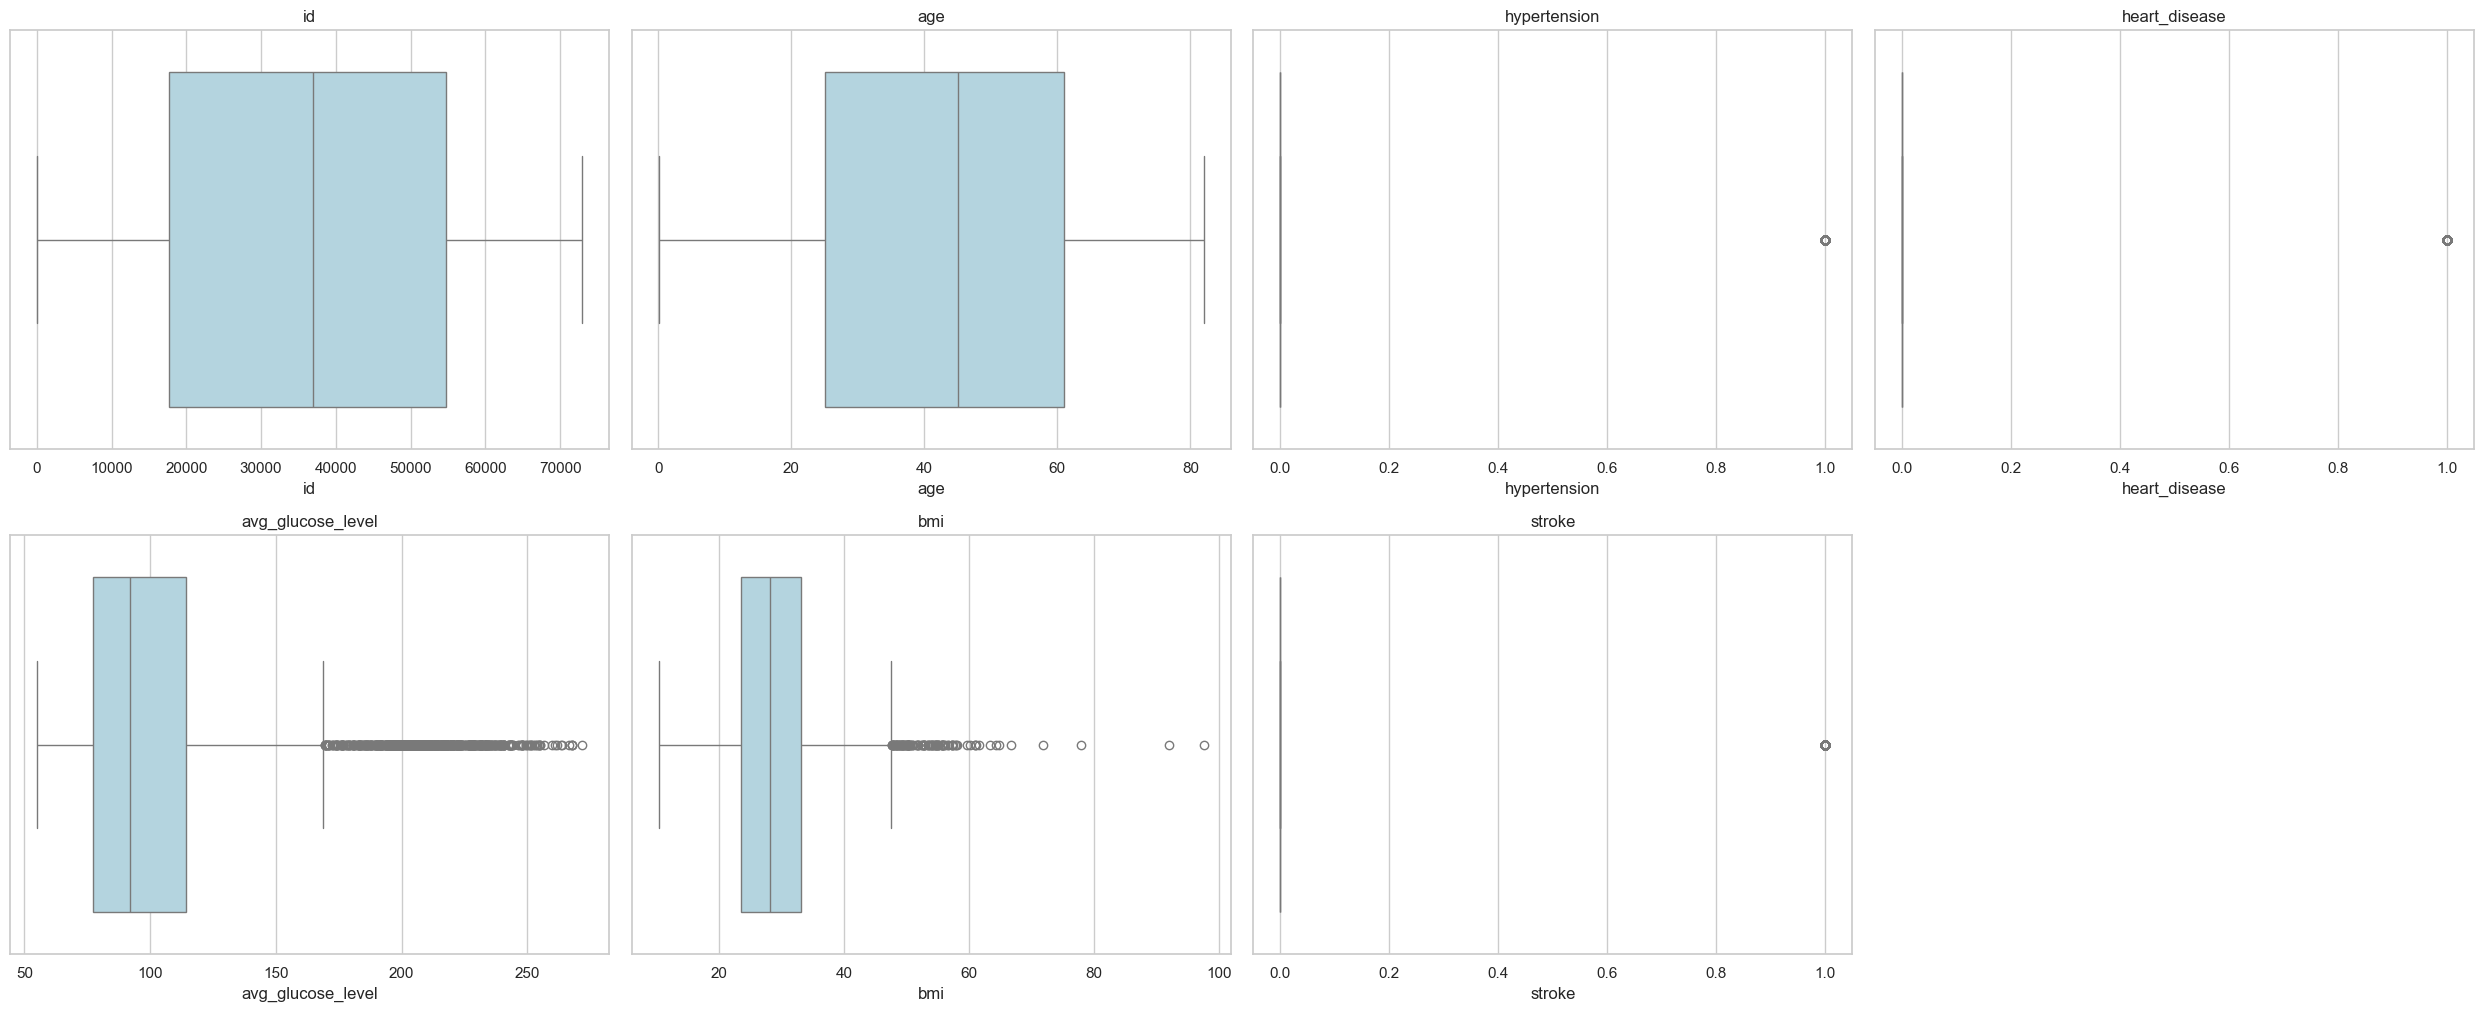

In [124]:
plt.figure(figsize=(25, 30))
for i, column in enumerate(df.select_dtypes(include=np.number).columns):
    plt.subplot(6, 4, i + 1)
    sns.boxplot(x=df[column], color="lightblue")
    plt.title(column)
plt.tight_layout()
plt.show()

Visualisasi Distribusi Gender

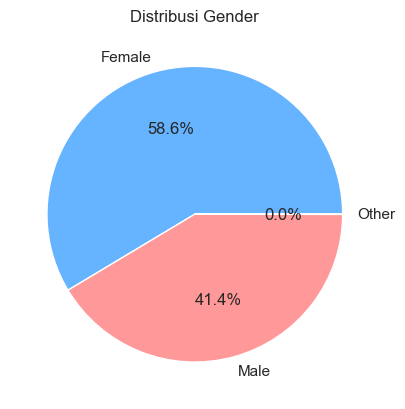

Distribusi gender:
gender
Female    2994
Male      2115
Other        1
Name: count, dtype: int64


In [125]:
plt.pie(
    df.gender.value_counts(),
    labels=df.gender.value_counts().index,
    autopct='%1.1f%%',
    colors=['#66b3ff','#ff9999','#99ff99']
)
plt.title("Distribusi Gender")
plt.show()

print("Distribusi gender:")
print(df['gender'].value_counts())

Korelasi Antar Fitur (Heatmap)

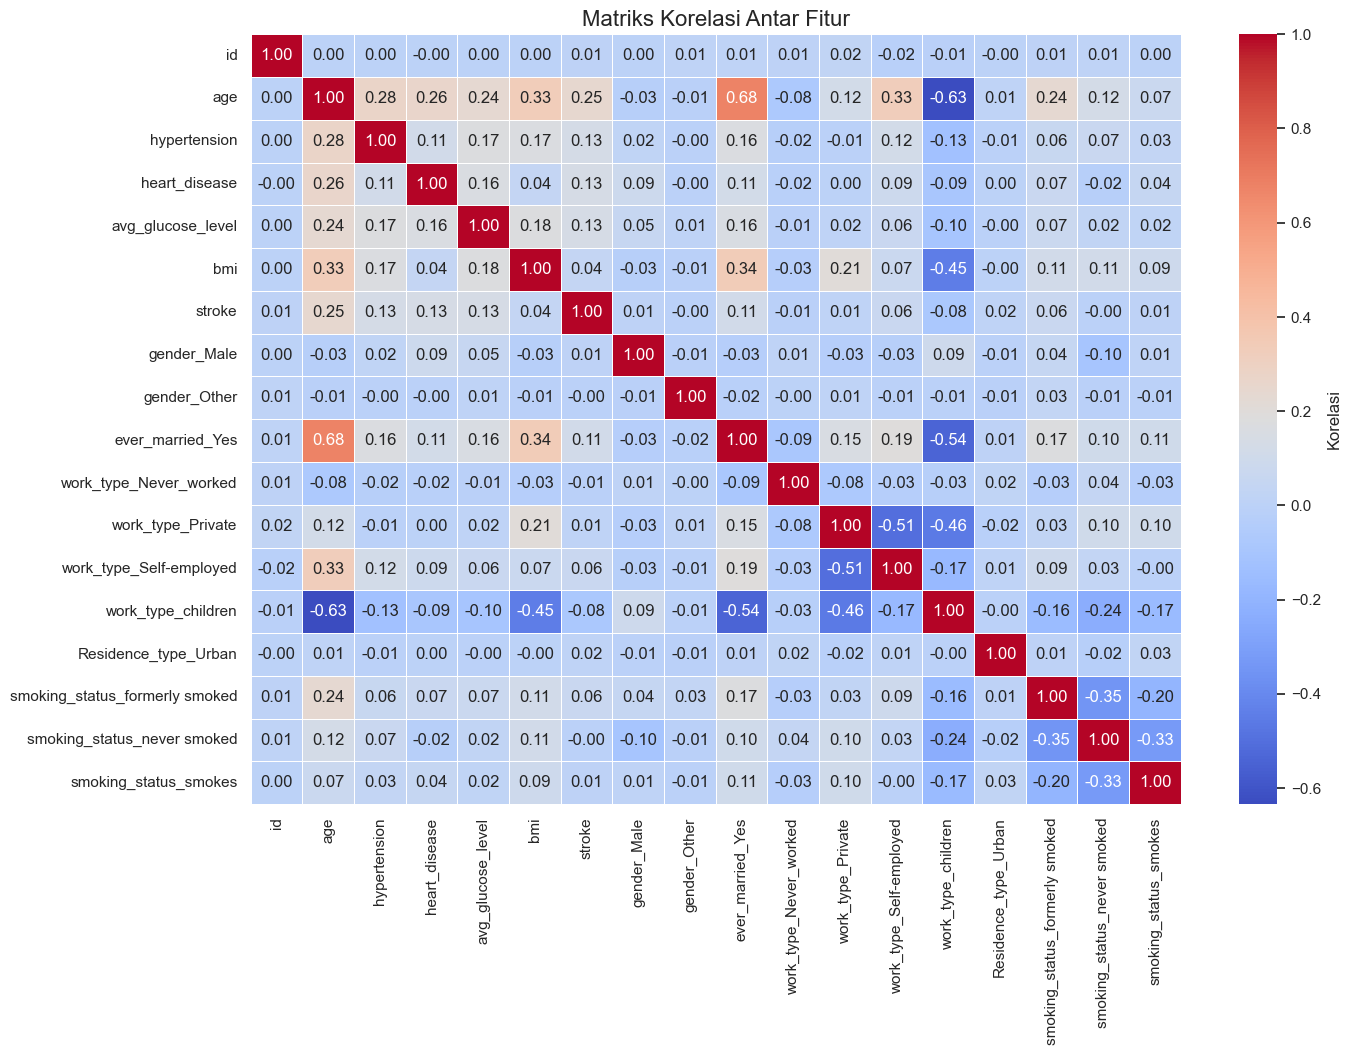

In [126]:
df_encoded = pd.get_dummies(df, drop_first=True)
correlation_matrix = df_encoded.corr()

plt.figure(figsize=(15, 10))
sns.heatmap(
    correlation_matrix,
    annot=True,
    fmt=".2f",
    cmap='coolwarm',
    linewidths=0.5,
    cbar_kws={'label': 'Korelasi'}
)
plt.title('Matriks Korelasi Antar Fitur', fontsize=16)
plt.show()

## **Data Preparation**

### **Data Cleansing**

Drop kolom

In [127]:
df.drop(columns=['id'], inplace=True, errors='ignore')

Drop baris dengan missing values di kolom penting

In [128]:
df.dropna(subset=['bmi', 'avg_glucose_level', 'smoking_status'], inplace=True)

Mapping variabel kategorikal ke numerik

In [129]:
df['gender'] = df['gender'].map({'Male': 0, 'Female': 1, 'Other': 2})
df['Residence_type'] = df['Residence_type'].map({'Urban': 1, 'Rural': 0})
df['ever_married'] = df['ever_married'].map({'Yes': 1, 'No': 0})

One-hot encoding untuk kolom kategorikal lainnya

In [130]:
df = pd.get_dummies(df, columns=['work_type', 'smoking_status'], drop_first=True)

Hapus duplikat

In [131]:
df = df.drop_duplicates()

### **Data Transformation**

Import Library yang Diperlukan

In [132]:
from sklearn.preprocessing import StandardScaler

Pisahkan fitur untuk clustering

In [133]:
X_kmeans = df.drop(columns=['stroke'])

Standardisasi fitur

In [134]:
scaler = StandardScaler()
X_scaled_kmeans = scaler.fit_transform(X_kmeans)

## **Modeling**

### **Build model**

Import library

In [135]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

Tentukan jumlah cluster optimal

In [136]:
optimal_k = 3

Bangun model KMeans dengan parameter

In [137]:
kmeans_model = KMeans(n_clusters=optimal_k, random_state=42, n_init=10, max_iter=300)

Fit model ke data

In [138]:
cluster_labels = kmeans_model.fit_predict(X_scaled)

Tambahkan hasil cluster ke dataframe

In [139]:
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)


Evaluasi awal dengan silhouette score

In [140]:
print("X_scaled.shape:", X_scaled.shape)
print("cluster_labels.shape:", cluster_labels.shape)


X_scaled.shape: (4909, 15)
cluster_labels.shape: (4909,)


In [141]:
score = silhouette_score(X_scaled, cluster_labels)
print(f"Silhouette Score (Before Tuning): {score:.4f}")

Silhouette Score (Before Tuning): 0.2265


### **Evaluasi model Before**

Import library

In [142]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt


Akurasi dan Classification Report

In [143]:
print("Akurasi model:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Akurasi model: 0.560081466395112
Confusion Matrix:
 [[500 429]
 [  3  50]]
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.54      0.70       929
           1       0.10      0.94      0.19        53

    accuracy                           0.56       982
   macro avg       0.55      0.74      0.44       982
weighted avg       0.95      0.56      0.67       982



ROC Curve dan AUC Score

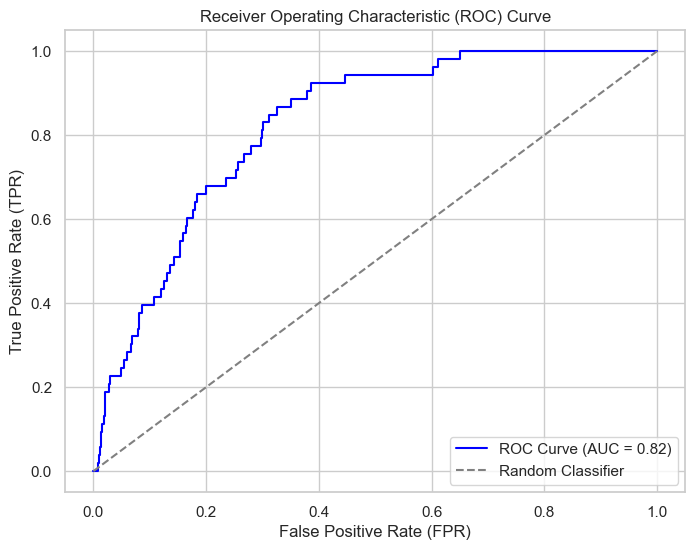

AUC Score: 0.8227755549688243


In [144]:
y_prob = model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = roc_auc_score(y_test, y_prob)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', label='Random Classifier')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

print("AUC Score:", roc_auc)

Elbow Method

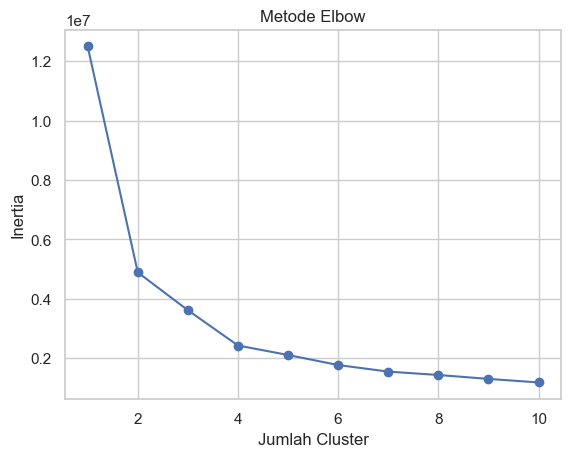

In [145]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

inertia = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

plt.plot(k_range, inertia, 'o-')
plt.title('Metode Elbow')
plt.xlabel('Jumlah Cluster')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()

Silhouette Score

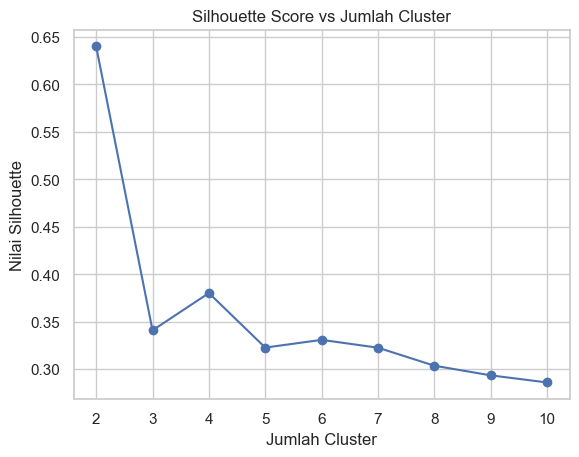

In [146]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

silhouette_scores = []
K = range(2, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    labels = kmeans.labels_
    score = silhouette_score(X, labels)
    silhouette_scores.append(score)

# Plot Silhouette Score
plt.plot(K, silhouette_scores, marker='o')
plt.title('Silhouette Score vs Jumlah Cluster')
plt.xlabel('Jumlah Cluster')
plt.ylabel('Nilai Silhouette')
plt.grid(True)
plt.show()

### **Model Tuning**

Import dan Setup Pipeline

In [147]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

Membuat Pipeline KMeans

In [148]:
pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('pca', PCA(n_components=0.90, random_state=42)),
    ('kmeans', KMeans(random_state=42))
])

Menentukan Parameter Grid untuk GridSearch

In [149]:
param_grid = {
    'kmeans__n_clusters': [2, 3, 4, 5, 6],
    'kmeans__init': ['k-means++', 'random'],
    'kmeans__n_init': [10, 50],
    'kmeans__max_iter': [300, 500]
}

Membuat Custom Scoring Function

In [150]:
def silhouette_scorer(estimator, X):
    labels = estimator.predict(X)
    return silhouette_score(X, labels)

Grid Search CV untuk Tuning KMeans

In [151]:
grid_search = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    scoring=silhouette_scorer,
    cv=5,
    n_jobs=-1
)

Training Grid Search

In [152]:
grid_search.fit(X_scaled_df)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('imputer',
                                        SimpleImputer(strategy='median')),
                                       ('pca',
                                        PCA(n_components=0.9, random_state=42)),
                                       ('kmeans', KMeans(random_state=42))]),
             n_jobs=-1,
             param_grid={'kmeans__init': ['k-means++', 'random'],
                         'kmeans__max_iter': [300, 500],
                         'kmeans__n_clusters': [2, 3, 4, 5, 6],
                         'kmeans__n_init': [10, 50]},
             scoring=<function silhouette_scorer at 0x00000227DC4B2340>)

Menampilkan Hasil Tuning

In [153]:
best_params = grid_search.best_params_
best_score = grid_search.best_score_
best_model = grid_search.best_estimator_

print("Best Params:", best_params)
print(f"Best Silhouette Score: {best_score:.4f}")

Best Params: {'kmeans__init': 'k-means++', 'kmeans__max_iter': 300, 'kmeans__n_clusters': 2, 'kmeans__n_init': 10}
Best Silhouette Score: 0.2425


Ekstraksi Label dan PCA dari Model Terbaik

In [154]:
X_imputed = best_model.named_steps['imputer'].transform(X_scaled_df)
X_pca = best_model.named_steps['pca'].transform(X_imputed)
labels = best_model.named_steps['kmeans'].labels_
centroids = best_model.named_steps['kmeans'].cluster_centers_

Visualisasi Hasil Klasterisasi Setelah Tuning

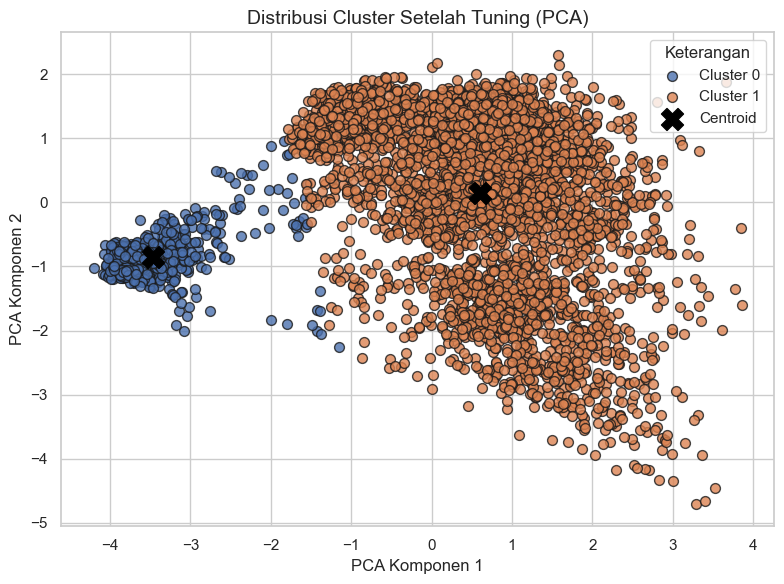

In [155]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

sns.set(style="whitegrid")

plt.figure(figsize=(8, 6))

for cluster_id in np.unique(labels):
    plt.scatter(
        X_pca[labels == cluster_id, 0],
        X_pca[labels == cluster_id, 1],
        label=f'Cluster {cluster_id}',
        s=50, edgecolor='k', alpha=0.8
    )

plt.scatter(
    centroids[:, 0], centroids[:, 1],
    c='black', s=250, marker='X', label='Centroid'
)

plt.title('Distribusi Cluster Setelah Tuning (PCA)', fontsize=14)
plt.xlabel('PCA Komponen 1', fontsize=12)
plt.ylabel('PCA Komponen 2', fontsize=12)
plt.legend(title='Keterangan', loc='upper right')
plt.grid(True)
plt.tight_layout()
plt.show()


### **Evaluasi Model After**

Best Params dan Best Score

In [156]:
print("Best Params:", best_params)
print(f"Best Silhouette Score: {best_score:.4f}")


Best Params: {'kmeans__init': 'k-means++', 'kmeans__max_iter': 300, 'kmeans__n_clusters': 2, 'kmeans__n_init': 10}
Best Silhouette Score: 0.2425


Visualisasi Cluster dengan PCA

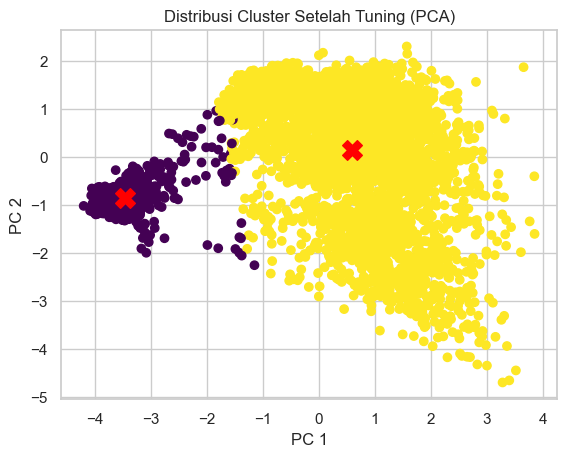

In [157]:
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis')
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='X', s=200)
plt.title("Distribusi Cluster Setelah Tuning (PCA)")
plt.xlabel("PC 1")
plt.ylabel("PC 2")
plt.grid(True)
plt.show()


menampilkan confusion matrix menggunakan heatmap dari seaborn

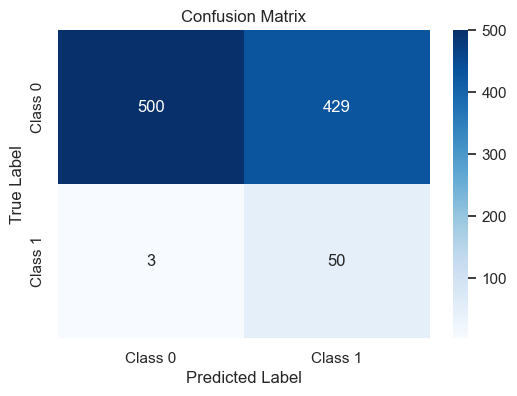

Confusion Matrix:
 [[500 429]
 [  3  50]]


In [158]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Class 0', 'Class 1'], 
            yticklabels=['Class 0', 'Class 1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

print("Confusion Matrix:\n", cm)

# **Deployment**


## **Save Model**

Impor Library yang Dibutuhkan

In [159]:
import joblib
from sklearn.naive_bayes import GaussianNB

Simpan Model dan Fitur

In [160]:
joblib.dump(model, "naive_bayes_stroke_model.pkl")

joblib.dump(X_train.columns.tolist(), "model_features.pkl")

print("Model dan fitur berhasil disimpan.")

Model dan fitur berhasil disimpan.


## **Konfigurasi Streamlit untuk deployment**

Autentikasi ngrok

In [161]:
!ngrok config add-authtoken 2wrHJPXV8EUUwSFOEtmT5zTf4pk_4Kqf7hrqQAfdyUbbQNBEV

Authtoken saved to configuration file: C:\Users\Raihan Tri Darma\AppData\Local/ngrok/ngrok.yml


In [162]:
import streamlit as st
import pandas as pd
import numpy as np
import joblib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, confusion_matrix, roc_curve, roc_auc_score
)

st.set_page_config(page_title="Dashboard Prediksi Stroke", page_icon="🧠")
st.title("🧠 Stroke Risk Prediction App")
st.write("Masukkan data pasien untuk memprediksi kemungkinan stroke berdasarkan model Naive Bayes.")
st.markdown("---")

try:
    model = joblib.load("naive_bayes_stroke_model.pkl")
    features = joblib.load("model_features.pkl")
except Exception as e:
    st.error(f"Gagal memuat model/fitur: {e}")
    st.stop()

data = pd.read_csv("healthcare-dataset-stroke-data.csv")
data.drop(columns=["id"], inplace=True, errors='ignore')
data.dropna(inplace=True)

data["gender"] = data["gender"].map({"Male": 0, "Female": 1, "Other": 2})
data["Residence_type"] = data["Residence_type"].map({"Urban": 1, "Rural": 0})
data = pd.get_dummies(data, drop_first=True)

for col in features:
    if col not in data.columns:
        data[col] = 0
data = data[features]

y = pd.read_csv("healthcare-dataset-stroke-data.csv")["stroke"]
y = y[:len(data)]

st.subheader("📊 Evaluasi Model")
y_pred = model.predict(data)
y_prob = model.predict_proba(data)[:, 1]

acc = accuracy_score(y, y_pred)
prec = precision_score(y, y_pred)
rec = recall_score(y, y_pred)
f1 = f1_score(y, y_pred)
roc_auc = roc_auc_score(y, y_prob)

col1, col2, col3, col4 = st.columns(4)
col1.metric("Accuracy", f"{acc:.2f}")
col2.metric("Precision", f"{prec:.2f}")
col3.metric("Recall", f"{rec:.2f}")
col4.metric("ROC AUC", f"{roc_auc:.2f}")

plot_option = st.selectbox("🧾 Pilih grafik untuk ditampilkan:", ["Pilih", "ROC AUC Curve", "Confusion Matrix"])
if plot_option == "ROC AUC Curve":
    fpr, tpr, _ = roc_curve(y, y_prob)
    fig, ax = plt.subplots()
    ax.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
    ax.plot([0, 1], [0, 1], linestyle='--', color='gray')
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title('ROC Curve')
    ax.legend()
    st.pyplot(fig)
elif plot_option == "Confusion Matrix":
    cm = confusion_matrix(y, y_pred)
    fig, ax = plt.subplots()
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax)
    ax.set_xlabel('Predicted')
    ax.set_ylabel('Actual')
    st.pyplot(fig)

st.markdown("---")

st.subheader("🧪 Prediksi Risiko Stroke (Form Pasien)")
with st.form("stroke_prediction_form"):
    gender = st.selectbox("Jenis Kelamin", options=["Male", "Female", "Other"])
    age = st.number_input("Umur", min_value=0, max_value=120, value=45)
    hypertension = st.selectbox("Hipertensi", options=["Tidak", "Ya"])
    heart_disease = st.selectbox("Penyakit Jantung", options=["Tidak", "Ya"])
    ever_married = st.selectbox("Pernah Menikah?", options=["No", "Yes"])
    work_type = st.selectbox("Jenis Pekerjaan", options=["Private", "Self-employed", "Govt_job", "children", "Never_worked"])
    residence_type = st.selectbox("Tipe Tempat Tinggal", options=["Urban", "Rural"])
    avg_glucose = st.number_input("Rata-rata Glukosa", min_value=0.0, max_value=300.0, value=100.0)
    bmi = st.number_input("BMI", min_value=10.0, max_value=100.0, value=25.0)
    smoking_status = st.selectbox("Status Merokok", options=["never smoked", "formerly smoked", "smokes", "Unknown"])
    submit = st.form_submit_button("🎯 Prediksi Risiko")

def map_inputs():
    gender_map = {"Male": 0, "Female": 1, "Other": 2}
    married_map = {"Yes": 1, "No": 0}
    residence_map = {"Urban": 1, "Rural": 0}

    base = dict.fromkeys(features, 0)
    base.update({
        "age": age,
        "hypertension": 1 if hypertension == "Ya" else 0,
        "heart_disease": 1 if heart_disease == "Ya" else 0,
        "avg_glucose_level": avg_glucose,
        "bmi": bmi,
        "gender": gender_map[gender],
        "Residence_type": residence_map[residence_type]
    })

    dummy_work = f"work_type_{work_type}"
    dummy_smoke = f"smoking_status_{smoking_status}"
    if dummy_work in base:
        base[dummy_work] = 1
    if dummy_smoke in base:
        base[dummy_smoke] = 1
    if "ever_married_Yes" in base and ever_married == "Yes":
        base["ever_married_Yes"] = 1

    return pd.DataFrame([base])

if submit:
    try:
        input_df = map_inputs()
        pred = model.predict(input_df)[0]
        prob = model.predict_proba(input_df)[0][1]
        st.subheader("🔎 Hasil Prediksi")
        if pred == 1:
            st.error(f"⚠️ Pasien diprediksi **BERISIKO STROKE**\n\nProbabilitas: **{prob:.2f}**")
        else:
            st.success(f"✅ Pasien diprediksi **TIDAK berisiko stroke**\n\nProbabilitas: **{prob:.2f}**")
    except Exception as e:
        st.error(f"❌ Terjadi error saat prediksi: {e}")


2025-06-14 05:19:44.838 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-14 05:19:44.839 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-14 05:19:44.839 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-14 05:19:44.840 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-14 05:19:44.840 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-14 05:19:44.840 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-14 05:19:44.840 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-14 05:19:44.862 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar

Setup deployment menggunakan pyngrok

In [163]:
from pyngrok import ngrok
import threading
import time
import os

Script untuk menjalankan Streamlit dan membuka akses publik via ngrok

In [164]:
def run_streamlit():
    os.system("streamlit run app.py --server.port 8501")

thread = threading.Thread(target=run_streamlit, daemon=True)
thread.start()

time.sleep(5)

public_url = ngrok.connect(addr=8501)
print(f"Streamlit app is live at: {public_url}")

Streamlit app is live at: NgrokTunnel: "https://fe92-36-69-141-125.ngrok-free.app" -> "http://localhost:8501"
